<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_4_version2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашняя работа №4

Для датасета kaggle, Credit Card Fraud Detection. https://www.kaggle.com/mlg-ulb/creditcardfraud 

In [105]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing


%matplotlib inline


**1. Загрузить датасет**

In [2]:
data=pd.read_csv('creditcard.csv') 
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**2. Посмотреть отсутствующие значения (какое количество Nan элементов).**

In [56]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

таких элементов нет

**3. Основное таргет значение: 1 - сделка была обманной, 0 - честной. Сделать график barplot для этих двух классов из колонки 'Class'. Посчитать количество элементов в классе 1 и в классе 2.**

In [87]:
a = data['Class'].value_counts()
a

0    284315
1       492
Name: Class, dtype: int64

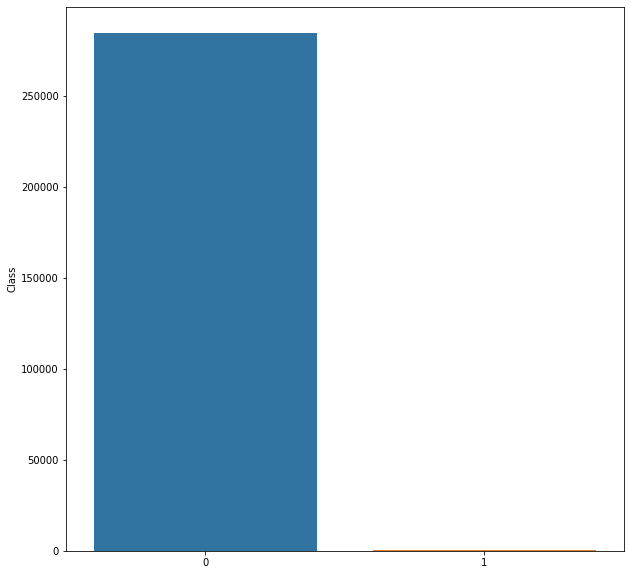

In [86]:

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=a.index, y=a)

**4. Сколько денег было использовано в обманных операциях, а сколько - в нормальных операциях?** Сделать частотный график по колонке Amount для колонки Class по двум независимым выборкам: обманная операция, нормальная операция

In [11]:
data.groupby('Class')['Amount'].sum()

Class
0    2.510246e+07
1    6.012797e+04
Name: Amount, dtype: float64

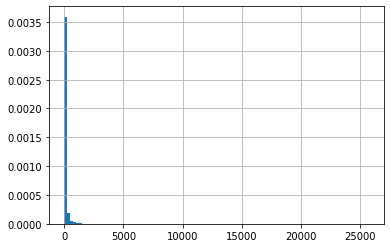

In [90]:
data[data['Class'] == 0]['Amount'].hist(bins = 100, normed = True)

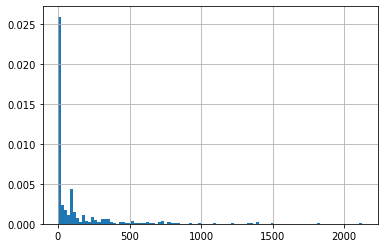

In [91]:
data[data['Class'] == 1]['Amount'].hist(bins = 100, normed = True)

**5. Построить графики histograms для всех значений**

Time


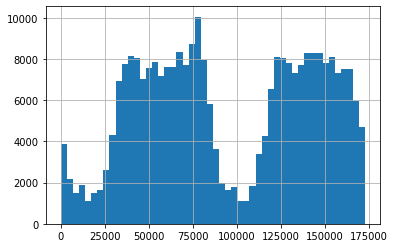

V1


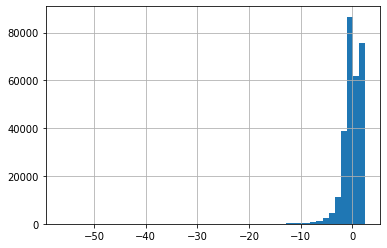

V2


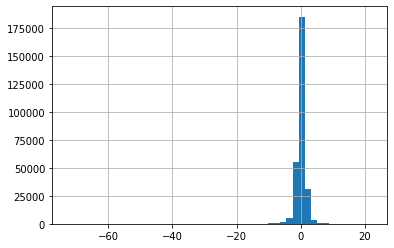

V3


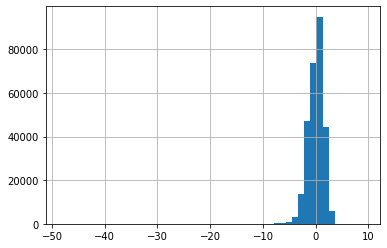

V4


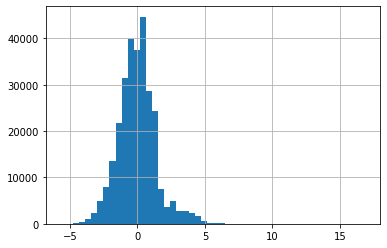

V5


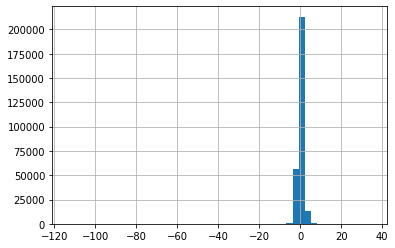

V6


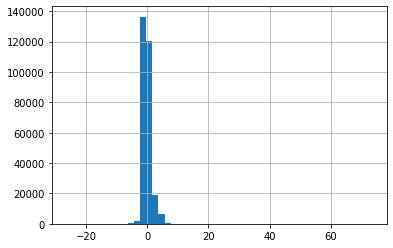

V7


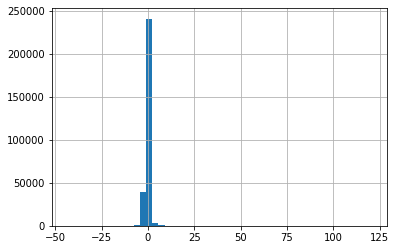

V8


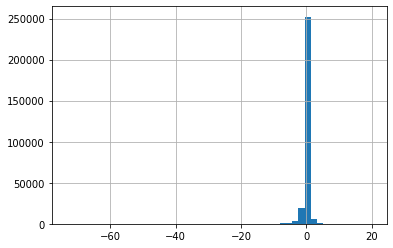

V9


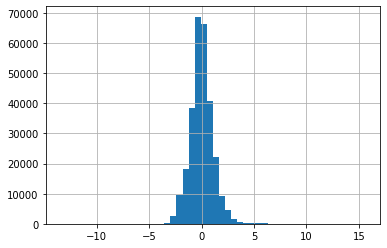

V10


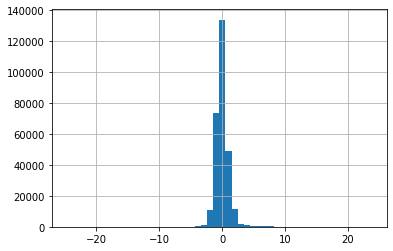

V11


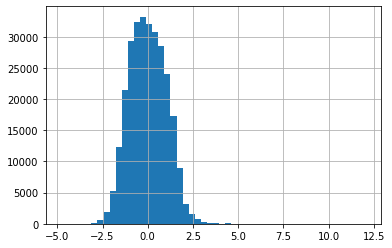

V12


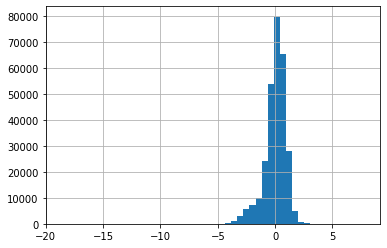

V13


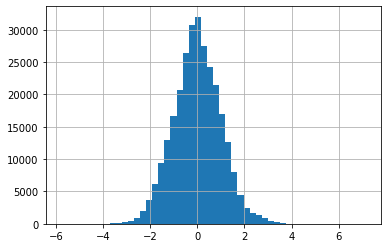

V14


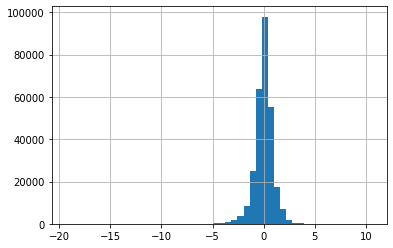

V15


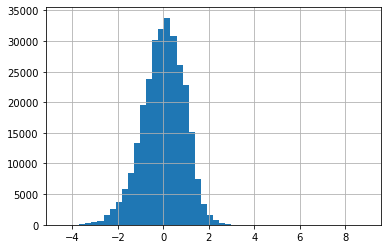

V16


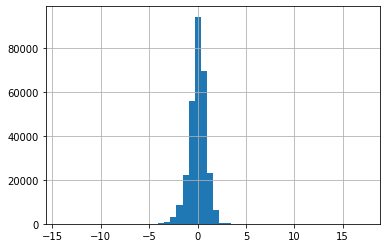

V17


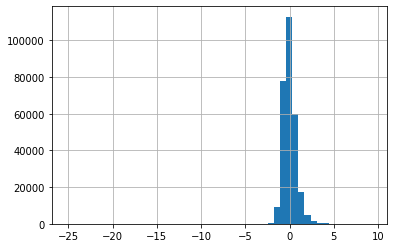

V18


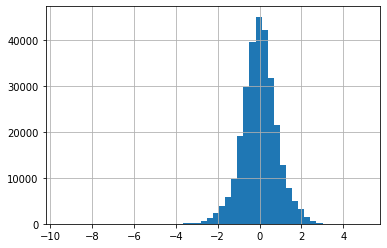

V19


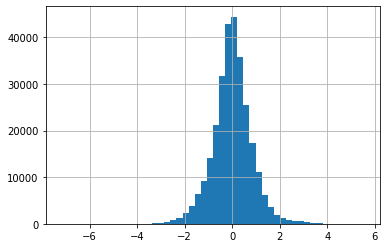

V20


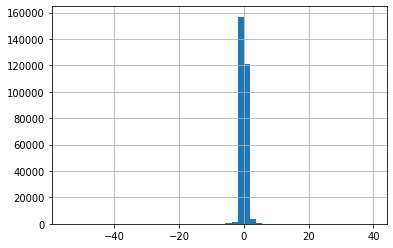

V21


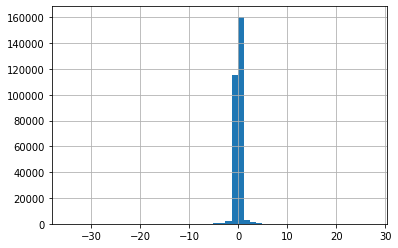

V22


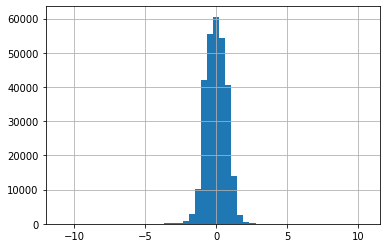

V23


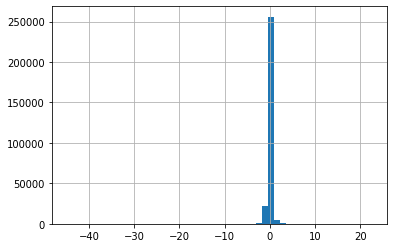

V24


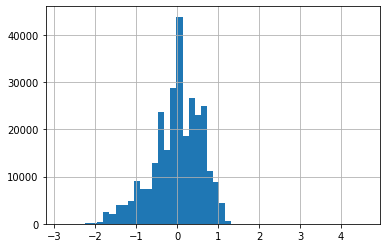

V25


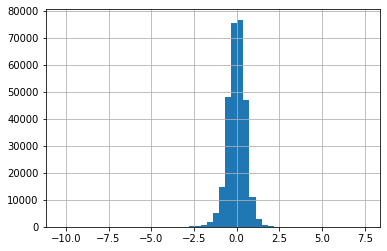

V26


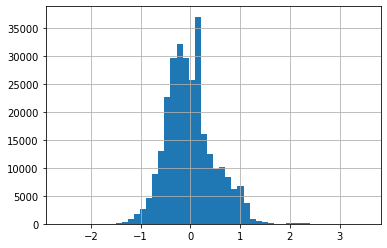

V27


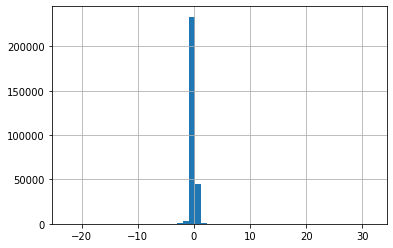

V28


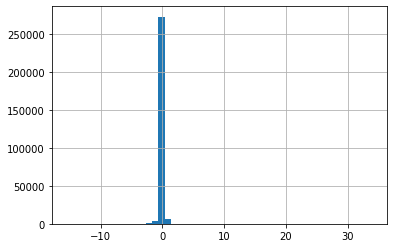

Amount


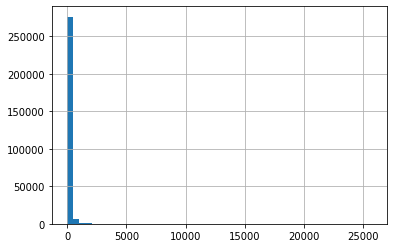

Class


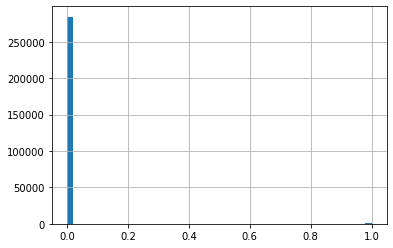

In [93]:
for i in data:
    print(i)
    data[i].hist(bins = 50)
    plt.show()

**6. Построить матрицу корреляций для всех значений**

In [27]:
data.corr().style.background_gradient(cmap='coolwarm')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1,0.117396,-0.0105933,-0.419618,-0.10526,0.173072,-0.0630165,0.0847144,-0.0369494,-0.00866043,0.0306166,-0.247689,0.124348,-0.065902,-0.0987568,-0.183453,0.0119029,-0.0732972,0.0904381,0.0289753,-0.050866,0.0447357,0.144059,0.0511424,-0.0161819,-0.233083,-0.0414071,-0.00513459,-0.00941269,-0.0105964,-0.0123226
V1,0.117396,1,4.69735e-17,-1.42439e-15,1.75532e-17,6.39116e-17,2.39807e-16,1.99155e-15,-9.49068e-17,2.16958e-16,7.43382e-17,2.43858e-16,2.42209e-16,-2.11546e-16,9.35258e-16,-3.25245e-16,6.30879e-16,-5.01152e-16,2.87013e-16,1.81813e-16,1.03696e-16,-1.75507e-16,7.47737e-17,9.80871e-16,7.35427e-17,-9.80536e-16,-8.6219e-17,3.20823e-17,9.82089e-16,-0.227709,-0.101347
V2,-0.0105933,4.69735e-17,1,2.51218e-16,-1.12639e-16,-2.03987e-16,5.02468e-16,3.96649e-16,-4.41398e-17,-5.72872e-17,-4.78239e-16,9.469e-16,-6.58825e-16,3.85452e-16,-2.54104e-16,2.83106e-16,4.9341e-17,-9.88301e-16,2.63665e-16,9.52828e-17,-9.30995e-16,8.44441e-17,2.50083e-16,1.05956e-16,-8.14235e-18,-4.26189e-17,2.60162e-16,-4.47847e-16,-3.67641e-16,-0.531409,0.0912887
V3,-0.419618,-1.42439e-15,2.51218e-16,1,-3.41691e-16,-1.43651e-15,1.43158e-15,2.16857e-15,3.43311e-16,-4.23377e-16,6.28927e-16,-5.50176e-17,2.20652e-16,-6.88337e-16,4.27134e-16,1.12276e-16,1.18336e-15,4.57662e-17,5.42796e-16,2.57677e-16,-9.4293e-16,-2.97197e-17,4.64826e-16,2.11521e-17,-9.35164e-17,4.77116e-16,6.5215e-16,6.23983e-16,7.72695e-16,-0.21088,-0.192961
V4,-0.10526,1.75532e-17,-1.12639e-16,-3.41691e-16,1,-1.94093e-15,-2.71266e-16,1.55633e-16,5.19564e-16,3.85958e-16,6.05549e-16,-2.0836e-16,-5.65796e-16,-1.50613e-16,-8.52244e-17,-1.50772e-16,-6.9392e-16,-4.39793e-16,1.49367e-16,-2.65694e-16,-3.22312e-16,-9.97695e-17,2.09992e-16,6.00253e-17,2.22974e-16,5.39459e-16,-6.17975e-16,-6.40342e-17,-5.86366e-17,0.0987317,0.133447
V5,0.173072,6.39116e-17,-2.03987e-16,-1.43651e-15,-1.94093e-15,1,7.92636e-16,-4.20985e-16,7.58919e-16,4.20521e-16,-6.60172e-16,7.34276e-16,3.76103e-16,-9.57866e-16,-3.6348e-16,-5.13262e-16,-3.51708e-16,1.42573e-16,1.10953e-15,-3.13823e-16,2.07605e-16,-1.3687e-16,5.06003e-16,1.6376e-16,-9.2861e-16,5.6251e-16,9.14469e-16,4.46596e-16,-3.29917e-16,-0.386356,-0.0949743
V6,-0.0630165,2.39807e-16,5.02468e-16,1.43158e-15,-2.71266e-16,7.92636e-16,1,1.42943e-16,-1.70742e-16,1.11445e-16,2.85078e-16,4.8658e-16,2.14059e-16,-2.26806e-16,3.4528e-16,-6.36811e-18,-2.47792e-16,3.56758e-16,2.81147e-16,2.71717e-16,1.89864e-16,-1.5759e-16,-3.3629e-16,-7.23219e-17,-1.26187e-15,1.08193e-15,-2.37841e-16,-2.62382e-16,4.81315e-16,0.215981,-0.0436432
V7,0.0847144,1.99155e-15,3.96649e-16,2.16857e-15,1.55633e-16,-4.20985e-16,1.42943e-16,1,-8.69183e-17,7.93325e-16,3.04333e-17,-1.0841e-15,1.51004e-15,-9.89233e-17,-1.72946e-16,1.93683e-17,2.89367e-16,1.14969e-15,-1.11679e-16,-2.87402e-16,1.74424e-16,1.9386e-16,-1.05813e-15,2.32791e-16,-2.58973e-17,1.17417e-15,-7.33451e-16,-5.88682e-16,-6.83676e-17,0.397311,-0.187257
V8,-0.0369494,-9.49068e-17,-4.41398e-17,3.43311e-16,5.19564e-16,7.58919e-16,-1.70742e-16,-8.69183e-17,1,2.90083e-16,9.05185e-17,1.95475e-16,-6.26606e-17,-2.38295e-16,-1.1311e-16,2.02149e-16,5.02719e-16,-3.50878e-16,-4.09385e-16,-5.33982e-16,-1.09553e-16,-2.41244e-16,5.47556e-16,3.8971e-16,-1.80297e-16,-1.39079e-16,-1.20997e-16,1.73363e-16,-4.48433e-16,-0.103079,0.0198751
V9,-0.00866043,2.16958e-16,-5.72872e-17,-4.23377e-16,3.85958e-16,4.20521e-16,1.11445e-16,7.93325e-16,2.90083e-16,1,-2.77176e-16,4.68234e-16,-2.44523e-15,-2.65035e-16,2.34332e-16,-1.58811e-15,-3.25191e-16,6.53599e-16,1.20384e-16,1.12075e-16,-4.34094e-16,4.57839e-17,2.87186e-17,5.92929e-16,-2.34638e-16,1.09965e-15,-1.38873e-15,-2.28741e-16,9.14678e-16,-0.0442456,-0.0977327


**7. Взять все имеющиеся атрибуты из таблицы для предсказания. Разделить на тренировочные и тестовые. Написать логистическую регрессию. Сделать classification report. Нормализовать значения. Написать логистическую регрессию. Сделать classification report, сравнить с предыдущим report. Есть ли улучшения?**

In [28]:
X = data.drop('Class', axis=1)
y = data.Class

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [33]:
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [34]:
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.78      0.60      0.68        87

    accuracy                           1.00     56962
   macro avg       0.89      0.80      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [36]:
headers = list(data.columns.values)

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
np_scaled = min_max_scaler.fit_transform(data)
df_norm = pd.DataFrame(np_scaled)


df_norm.columns = headers
df_norm.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.000000,0.870385,0.532981,0.762730,-0.373955,0.526877,-0.464663,-0.466370,0.572888,-0.049377,...,0.122369,0.045984,0.327586,-0.217495,0.170244,-0.210886,-0.162048,-0.374607,-0.988352,-1.0
1,-1.000000,0.957084,0.540133,0.680597,-0.456407,0.532241,-0.475617,-0.470249,0.572597,-0.092038,...,0.115680,-0.039526,0.333876,-0.327120,0.174581,-0.107974,-0.167310,-0.373155,-0.999791,-1.0
2,-0.999988,0.870434,0.506235,0.736282,-0.462469,0.524658,-0.437756,-0.459646,0.576085,-0.178795,...,0.130955,0.092060,0.357878,-0.421292,0.119030,-0.194546,-0.169021,-0.376177,-0.970522,-1.0
3,-0.999988,0.883756,0.530608,0.736967,-0.572678,0.531294,-0.448882,-0.466394,0.578868,-0.170001,...,0.119467,0.020554,0.325214,-0.552348,0.228491,-0.221607,-0.164663,-0.371258,-0.990386,-1.0
4,-0.999977,0.877234,0.553040,0.728501,-0.460407,0.525950,-0.472032,-0.462064,0.564967,-0.018101,...,0.122655,0.094541,0.326784,-0.197460,0.132685,0.014994,-0.158878,-0.365020,-0.994551,-1.0


In [46]:
X_norm = df_norm.drop('Class', axis=1)
y_norm = df_norm.Class

In [51]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(
    X_norm, y_norm, test_size=0.2, random_state=1)

In [52]:
model = LogisticRegression(solver='liblinear').fit(X_train_norm, y_train_norm)

In [53]:
model_pred = model.predict(X_test_norm)
print(classification_report(y_test_norm, model_pred))

              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00     56875
         1.0       0.87      0.55      0.68        87

    accuracy                           1.00     56962
   macro avg       0.94      0.78      0.84     56962
weighted avg       1.00      1.00      1.00     56962



**8. Написать модель RandomForestClassifier на данный датасет и сравнить результаты с логистической регрессией. Почему результаты получились лучше (или хуже). Тренировочные и тестовые данные выбираем одинаковые (те же, что и для логистической регрессии), полученные на шаге 7.**

In [96]:
model=RandomForestClassifier(n_estimators=100, n_jobs=-1)

model.fit(X_train,y_train)

headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

No handles with labels found to put in legend.


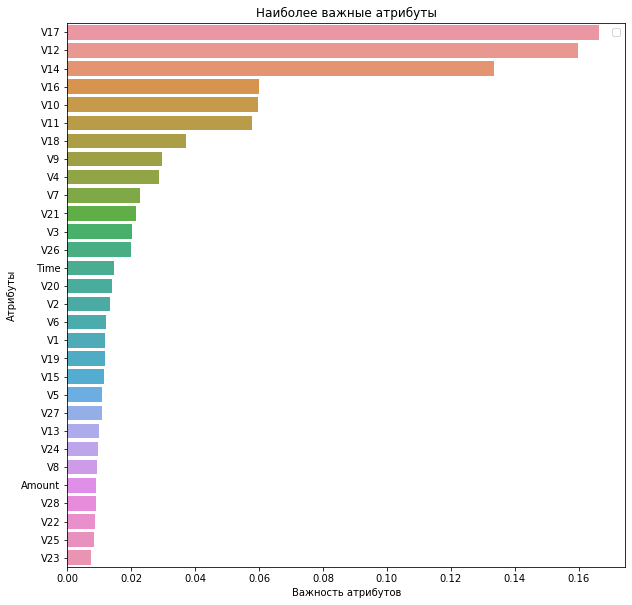

In [97]:
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [108]:
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))
# model.score(X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.78      0.60      0.68        87

    accuracy                           1.00     56962
   macro avg       0.89      0.80      0.84     56962
weighted avg       1.00      1.00      1.00     56962



RandomForestClassifier лучше логистической регрессии в нашем случае тк все признаки у мошенников формируются по выбору мошенника тем самым зависимость целевой переменной от признаков имеет нелинейный характер.

**9. Уравновесить классы с помощью up-sampling (тестовые данные не меняем, только тренировочные). Написать логистическую регрессию на сгенерированные данные и сравнить результат с моделями, полученными на шаге 7 и 8. В качестве тестовых данных используем один и тот же датасет, полученный на шаге 7.**

In [120]:
ros = RandomOverSampler(random_state=0)

ros.fit(X_train, y_train)
X_resampled, y_resampled = ros.fit_sample(X_train, y_train)
print('Количество элементов до операции:', len(X_train))
print('Количество элементов после операции:', len(X_resampled))

Количество элементов до операции: 227845
Количество элементов после операции: 454880


In [122]:
model = LogisticRegression(solver='liblinear').fit(X_resampled, y_resampled)

model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56875
           1       0.05      0.84      0.09        87

    accuracy                           0.98     56962
   macro avg       0.52      0.91      0.54     56962
weighted avg       1.00      0.98      0.99     56962



In [123]:
model_pred.sum()

1454